# Regression Linéaire Simple du dataset Ads - Gradient Descent

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1. Dataset
Chargement du dataset Iris pour effectuer les prédictions de la largeur des pétales en fonction de longueur des pétales

In [119]:
dataset=pd.read_csv("Advertising.csv")

In [120]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


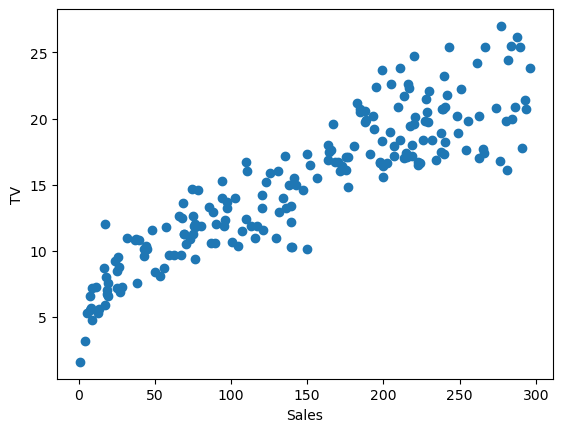

In [121]:
plt.plot(dataset["TV"],dataset["Sales"],'o')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.show()

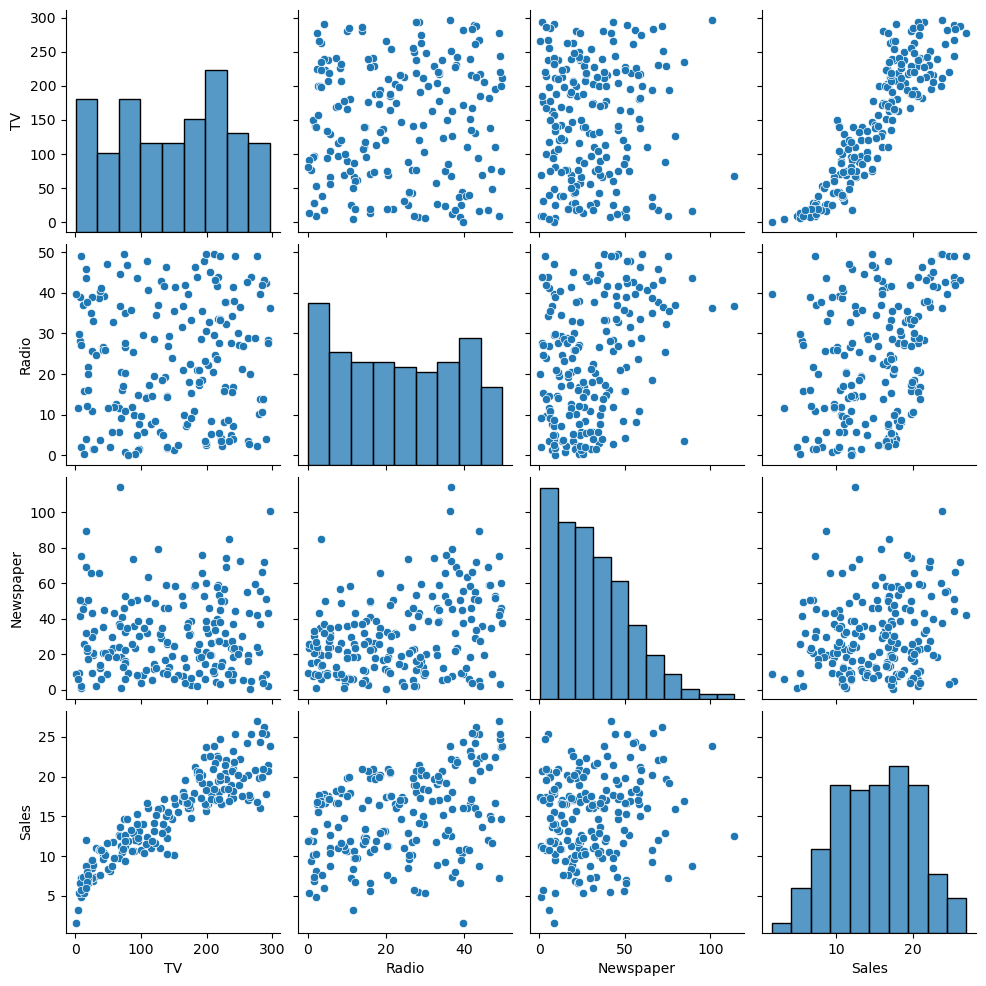

In [122]:
sns.pairplot(dataset)

In [123]:
features = ['TV', 'Newspaper', 'Radio']
df = dataset[features+['Sales']]
x={}
for feature in features:
    x[feature] = df[feature]
# x_tv = df.TV
# x_newspaper = df.Newspaper
# x_radio = df.Radio
y = df.Sales


In [124]:
# x_tv.shape
# x_newspaper.shape
# x_radio.shape

In [125]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [126]:
y.shape

(200,)

Important: Après avoir vérifié les dimensions de x_tv et y, On remarque que y n'a pas les dimensions (150, 1) et x_tv n'a pas les dimensions (150,2). On corrige le problème avec np.reshape et values.

In [127]:
for feature in features :
    x[feature] = dataset[feature].values.reshape(200,1)
# x_tv=dataset.TV.values.reshape(200,1)
# x_newspaper=dataset.Newspaper.values.reshape(200,1)
# x_radio=dataset.Radio.values.reshape(200,1)
y=dataset.Sales.values.reshape(200,1)

In [128]:
print(x['TV'].shape)
print(y.shape)

(200, 1)
(200, 1)


Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x_tv et un vecteur 1 (avec np.ones) de dimension égale a celle de x_tv

In [129]:
#X=np.hstack((np.ones((150,1)),x_tv))
X={}
for feature in features:
    X[feature]=np.hstack((x[feature],(np.ones(x[feature].shape))))
# X_Radio=np.hstack((x_radio,(np.ones(x_radio.shape))))
# X_Newspaper=np.hstack((x_newspaper,(np.ones(x_newspaper.shape))))

In [130]:
for feature in features:
    print(x[feature].shape)
# print(x_radio.shape)
# print(x_newspaper.shape)
print(y.shape)

(200, 1)
(200, 1)
(200, 1)
(200, 1)


In [131]:
# découpage du dataset en dataset d'entrainement et dataset de test
x_train,x_test = {},{}
for feature in features:
    x_train[feature], x_test[feature], y_train, y_test = train_test_split(x[feature], y, test_size=0.2, random_state=42)
    print(x_train[feature].shape)
    print(x_test[feature].shape)
# x_tv_train, x_tv_test, y_train, y_test = train_test_split(x_tv, y, test_size=0.2, random_state=42)
# x_radio_train, x_radio_test, y_train, y_test = train_test_split(x_radio, y, test_size=0.2, random_state=42)
# x_newspaper_train, x_newspaper_test, y_train, y_test = train_test_split(x_newspaper, y, test_size=0.2, random_state=42)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)
(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [132]:
X_train,X_test={},{}
for feature in features:
    X_train[feature] =np.hstack((x_train[feature],(np.ones(x_train[feature].shape))))
    X_test[feature]  =np.hstack((x_test[feature],(np.ones(x_test[feature].shape))))
    print(X_train[feature].shape)
    print(X_test[feature].shape)
# X_Radio_train=np.hstack((x_radio_train,(np.ones(x_radio_train.shape))))
# X_Radio_test=np.hstack((x_radio_test,(np.ones(x_radio_test.shape))))
# X_Newspaper_train=np.hstack((x_newspaper_train,(np.ones(x_newspaper_train.shape))))
# X_Newspaper_test=np.hstack((x_newspaper_test,(np.ones(x_newspaper_test.shape))))
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 2)
(40, 2)
(160, 2)
(40, 2)
(160, 1)
(40, 1)


Finalement, création d'un vecteur parametre θ, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur 
θ, on utilise comme avant np.random.seed(0)

In [ ]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta={}
for feature in features:
    theta[feature]=np.random.randn(2,1)

Theta: [[1.76405235]
 [0.40015721]]


## 2. Modèle Linéaire
On implémente un modèle selon l'équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu'on a initialisé d'une manière aléatoire.


In [134]:
def model(X, theta):
    return X.dot(theta)

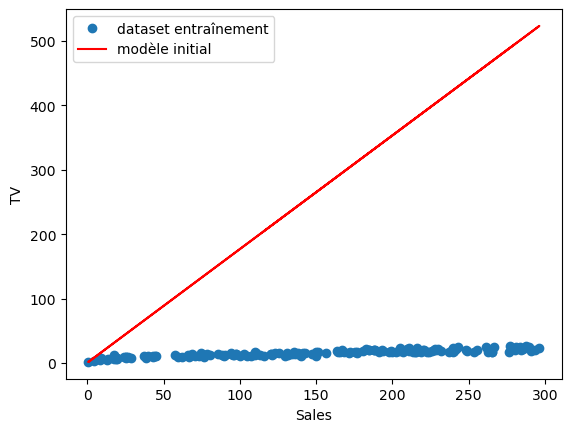

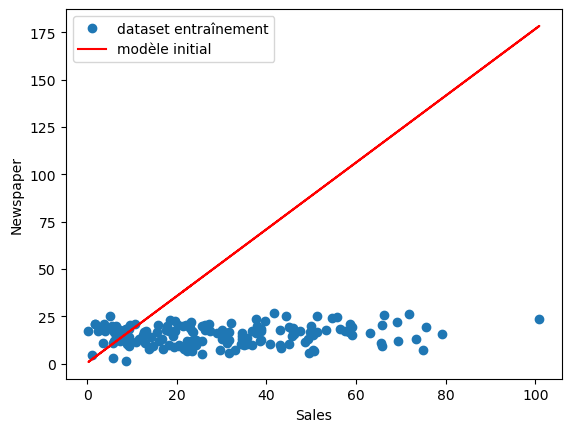

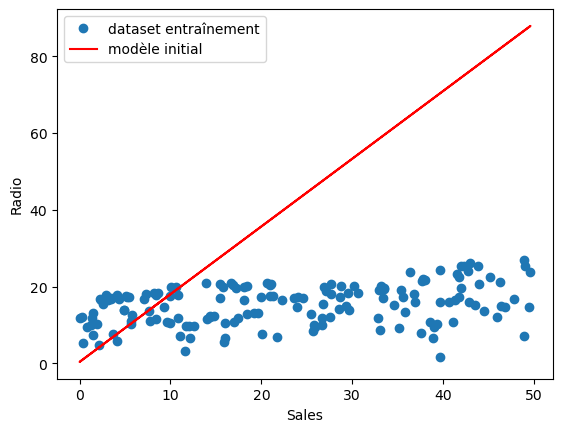

In [135]:
for feature in features:
    plt.plot(x_train[feature],y_train,'o',label='dataset entraînement')
    plt.plot(x_train[feature], model(X_train[feature], theta), c='r',label='modèle initial')
    plt.xlabel('Sales')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

## 3. Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.
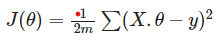

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [136]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [137]:
# cost_function(X_TV_train, y_train, theta)
# cost_function(X_Radio_train, y_train, theta)
# cost_function(X_Newspaper_train, y_train, theta)

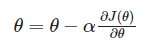

In [138]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [139]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        gradient = grad(X, y, theta)
        learning_rate = 0.0001 / (1 + np.linalg.norm(gradient))  # Adjust learning rate
        theta = theta - learning_rate * gradient # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        # print(feature)
        # print('learning_rate' , learning_rate)
        # print(cost_history[i])
        # print('theta' , theta)
    return theta, cost_history

## 5. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [140]:
n_iterations = 1000000
learning_rate = 0.0001

theta_final = {}
cost_history = {}
for feature in features:
    theta_final[feature], cost_history[feature] = gradient_descent(X_train[feature], y_train, theta, learning_rate, n_iterations)
    cost_history[feature] # l'historique de la fonction coût qu'on va afficher par la suite. on remarque que sa valeur déminue et c'est ça l'objectif

In [141]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

{'TV': array([[0.05549915],
        [7.00710734]]),
 'Newspaper': array([[ 0.03717439],
        [14.21741479]]),
 'Radio': array([[ 0.12000114],
        [12.58552398]])}

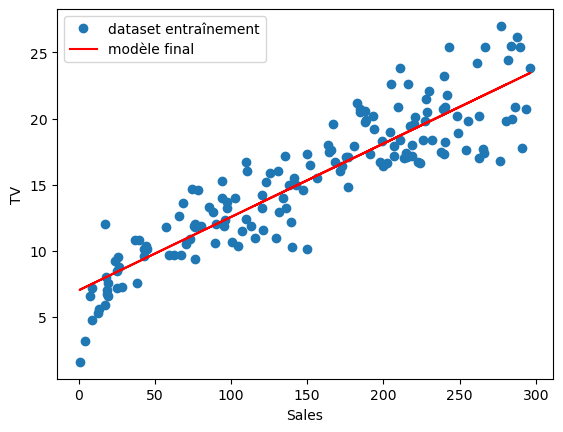

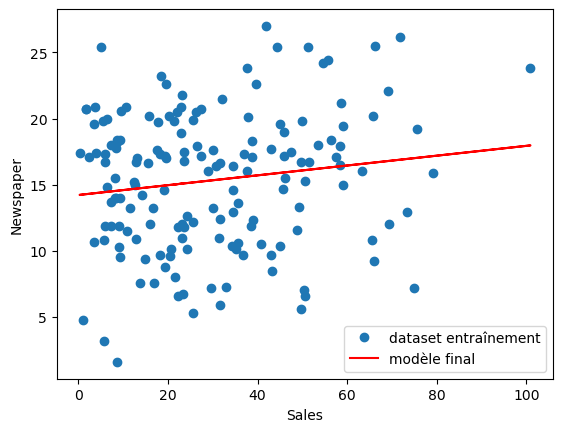

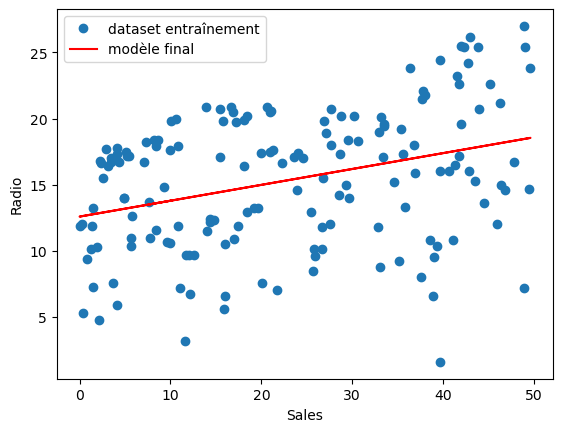

In [142]:
for feature in features:
    plt.plot(x_train[feature],y_train,'o',label='dataset entraînement')
    plt.plot(x_train[feature], model(X_train[feature], theta_final[feature]), c='r',label='modèle final')
    plt.xlabel('Sales')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

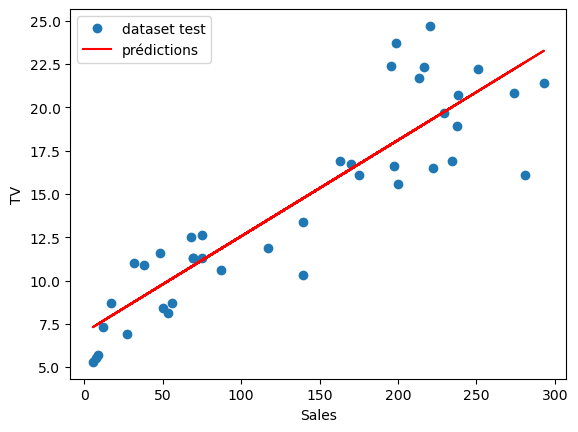

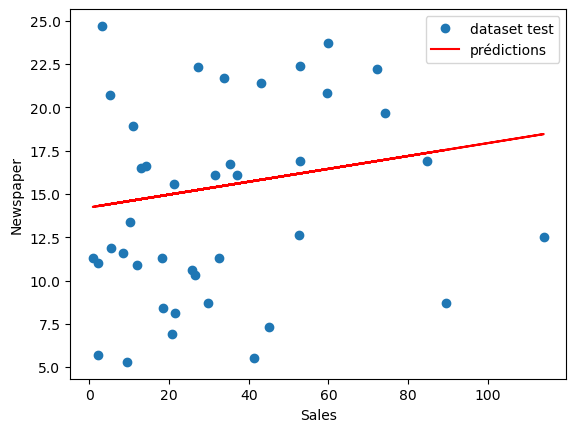

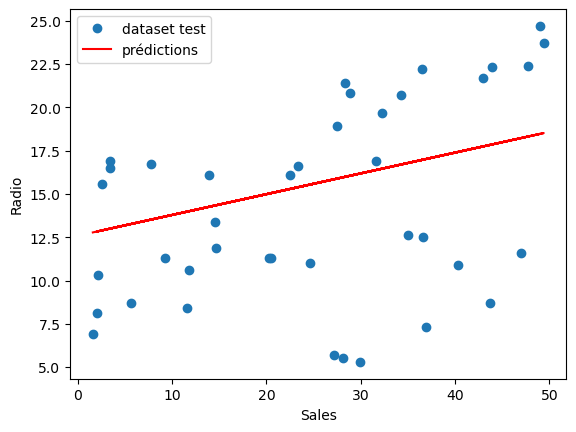

In [143]:
predictions = {}
for feature in features:
    # création d'un vecteur prédictions qui contient les prédictions de notre modele final
    predictions[feature] = model(X_test[feature], theta_final[feature])

    # Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
    plt.plot(x_test[feature],y_test,'o',label='dataset test')
    plt.plot(x_test[feature],predictions[feature] , c='r',label='prédictions')
    plt.xlabel('Sales')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [144]:
# Test: # prédire quelle serait la largeur d'un pétale qui a une longueur de 2,5 cm
# X_2_5= np.array([2.5,1])
# pred_y_2_5=model(X_2_5, theta_final) 
# print(pred_y_2_5)

## 6. Courbe d'apprentissage

   Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

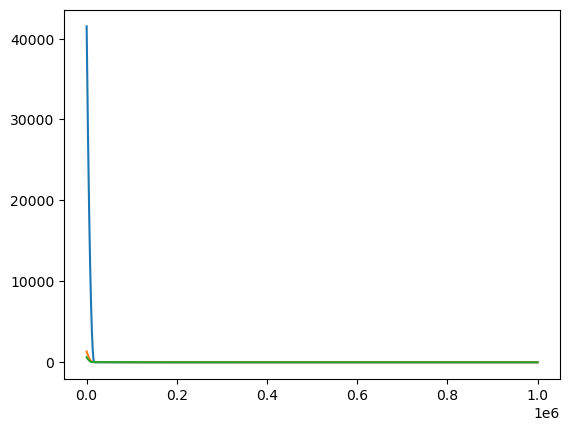

In [145]:
for feature in features:
    plt.plot(range(n_iterations), cost_history[feature])
plt.show()

## 7. Evaluation du modèle - Coefficient de détermination

   Le coefficient de détermination est un indice de la qualité de la prédiction de la régression linéaire. Le coefficient de détermination se situe entre 0 et 1. Plus il est proche de 1, plus la régression linéaire est en adéquation avec les données collectées

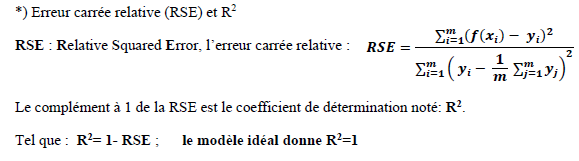

In [146]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [147]:
for feature in features:
    print(coef_determination(y_test, predictions[feature]))# predictions=model(X_test,theta_final)

0.8025334280758263
0.004586344086805361
0.10697088619923778


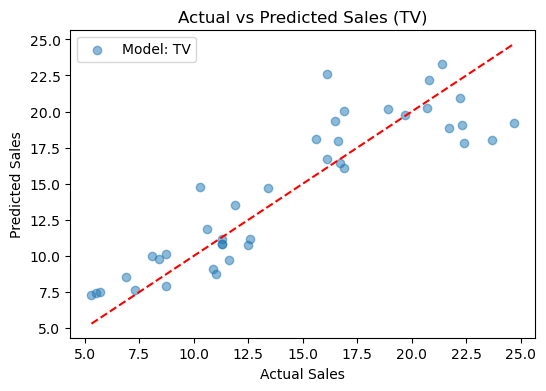

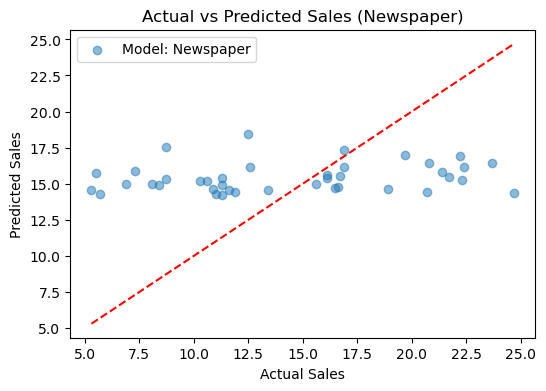

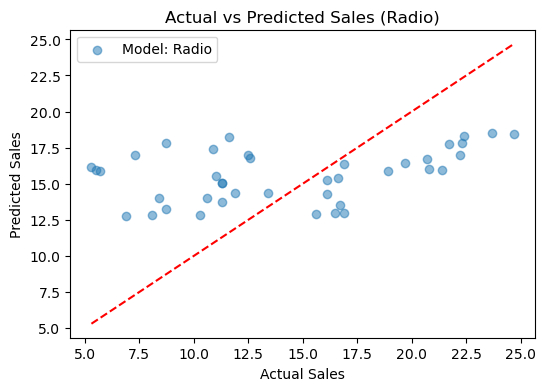

In [148]:
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, predictions[feature], alpha=0.5, label=f"Model: {feature}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"Actual vs Predicted Sales ({feature})")
    plt.legend()
    plt.show()


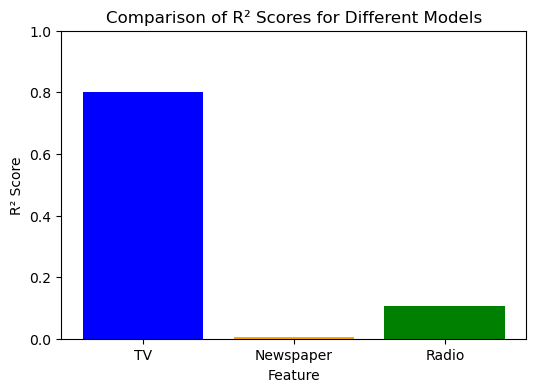

In [149]:
r2_scores = [coef_determination(y_test, predictions[feature]) for feature in features]

plt.figure(figsize=(6, 4))
plt.bar(features, r2_scores, color=['blue', 'orange', 'green'])
plt.xlabel("Feature")
plt.ylabel("R² Score")
plt.title("Comparison of R² Scores for Different Models")
plt.ylim(0, 1)  # R² is between 0 and 1
plt.show()
